In [1]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [2]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [3]:
# 計算 beer_servings 的平均值
drinks.beer_servings.mean()

106.16062176165804

In [4]:
# 計算 continent 是 'Africa' 的 beer_servings 平均值?
drinks[drinks.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [5]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [6]:
# 既然 groupby() 可以依照條件算出平均值，應該也可以算出 max(), min(), sum(), count()
drinks.groupby('continent').beer_servings.sum()
#drinks.groupby('continent').beer_servings.min()
#drinks.groupby('continent').beer_servings.max()
#drinks.groupby('continent').beer_servings.count()
#另有一個名為 agg() 函式，甚至可以一次帶入多重的 aggregation 計算

continent
Africa           3258
Asia             1630
Europe           8720
North America    3345
Oceania          1435
South America    2101
Name: beer_servings, dtype: int64

In [7]:
# 重新讀入 drinksbycountry
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [8]:
drinks.groupby('continent').beer_servings.agg(['mean', 'max', 'min', 'sum', 'count'])

,mean,max,min,sum,count
continent,,,,,
Africa,61.471698,376,0,3258,53
Asia,37.045455,247,0,1630,44
Europe,193.777778,361,0,8720,45
North America,145.434783,285,1,3345,23
Oceania,89.687500,306,0,1435,16
South America,175.083333,333,93,2101,12


In [9]:
drinks.describe()
#drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [10]:
# 當針對類別型欄位 continent 欄位群組化，且明確指定想要計算的欄位，會自動計算所有數值型欄位。
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [11]:
drinks.groupby('continent').agg(['mean','max','min','count','sum'])

beer_servings                      spirit_servings           \
                       mean  max min count   sum            mean  max min   
continent                                                                   
Africa            61.471698  376   0    53  3258       16.339623  152   0   
Asia              37.045455  247   0    44  1630       60.840909  326   0   
Europe           193.777778  361   0    45  8720      132.555556  373   0   
North America    145.434783  285   1    23  3345      165.739130  438  68   
Oceania           89.687500  306   0    16  1435       58.437500  254   0   
South America    175.083333  333  93    12  2101      114.750000  302  25   

                          wine_servings                       \
              count   sum          mean  max min count   sum   
continent                                                      
Africa           53   866     16.264151  233   0    53   862   
Asia             44  2677      9.068182  123   0    44   399   
Europe           45  5965    142.222222  370   0    45  6400   
North America    23  3812     24.521739  100   1    23   564   
Oceania          16   935     35.625000  212   0    16   570   
South America    12  1377     62.416667  221   1    12   749   

              total_litres_of_pure_alcohol                          
                                      mean   max  min count    sum  
continent                                                           
Africa                            3.007547   9.1  0.0    53  159.4  
Asia                              2.170455  11.5  0.0    44   95.5  
Europe                            8.617778  14.4  0.0    45  387.8  
North America                     5.995652  11.9  2.2    23  137.9  
Oceania                           3.381250  10.4  0.0    16   54.1  
South America                     6.308333   8.3  3.8    12   75.7

In [12]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib as plt
plt.rcParams["figure.figsize"] = (9,7) # 設定繪圖的大小

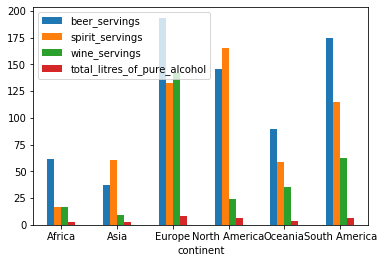

In [13]:
drinks.groupby('continent').mean().plot(kind='bar', rot=0)

Missing value (NaN) 的處理
NaN stands for Not a Number，表示 missing value (空值/遺漏值)
isnull() 檢視 DataFrame 各欄位是否為 NaN

In [17]:
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [20]:
# 找出 'Colors Reported' 是 NaN 的資料，並僅顯示最後 5 筆
#ufo[ufo.istnull()['Colors Reported']].tail()

In [21]:
# 將欄位 Colors Reported 不是 NaN 的所有資料列的最後 5 筆資料顯示出來
ufo[ufo.isnull()['Colors Reported']].tail()
#ufo[ufo['Colors Reported'].isnull()].tail()

,City,Colors Reported,Shape Reported,State,Time
18235,Fountain Hills,NaN,NaN,AZ,12/31/2000 23:00
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [22]:
ufo.shape

(18241, 5)

In [25]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [26]:
# every DataFrame has an index (sometimes called the "row labels")
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [27]:
# column names are also stored in a special "index" object
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [28]:
# index and columns both default to integers if you don't define them
pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [29]:
# identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [30]:
# selection: select a portion of the DataFrame using the index
drinks.loc[23, 'beer_servings']

245

In [31]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [32]:
# 設定一個 column ('country') 當成 index
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [33]:
# 'country' 現在已是 index
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [34]:
# 既然 'country' 已是 index，便可以使用 loc 選取內容
drinks.loc['Argentina']

beer_servings                             193
spirit_servings                            25
wine_servings                             221
total_litres_of_pure_alcohol              8.3
continent                       South America
Name: Argentina, dtype: object

In [35]:
drinks.loc['Argentina', 'beer_servings']

193

In [36]:
# 重新設定 index 後，如果顯示 drinks 內容，會發現多了一個 index 名稱 'country' 
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [37]:
# index name is optional
drinks.index.name = None # 去除 index 名稱
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [38]:
# 也可以在恢復原有的 index 
# restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [39]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [40]:
drinks.describe().loc['25%', 'beer_servings']

20.0

In [41]:
drinks.describe().loc['50%', 'beer_servings']

76.0

不僅 DataFrame 有 index，Series 也同樣有 index。
當替換 DataFrame 的 index， Series 的 index 也跟隨一併替換。

In [42]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [43]:
drinks.set_index('country', inplace=True)
drinks.index.name = None

In [44]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

In [45]:
# drinks 的 Series 其 index 也一併替換
drinks.continent.head()

Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [46]:
drinks.continent.head()

Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [47]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [48]:
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [49]:
# 使用 value_counts() 後取其 index
drinks.continent.value_counts()['Europe']

45

In [50]:
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [51]:
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [52]:
# 先檢視 drinks.beer_servings() 的 Series
drinks.beer_servings.head()

Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
Name: beer_servings, dtype: int64

In [53]:
# 再建立 people Series
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra',], name='人口數')
people

Albania    3000000
Andorra      85000
Name: 人口數, dtype: int64

In [54]:
# 計算所有的啤酒消耗量，將 drinks.beer_serving 的平均消耗量 x people 的人口數。
# 因為 people 只有兩筆，所以 drinks.beer_serving 193 筆資料裡只有兩筆會和 people 進行計算，其餘的結果是 NaN
(drinks.beer_servings * people).head(10)

Afghanistan                  NaN
Albania              267000000.0
Algeria                      NaN
Andorra               20825000.0
Angola                       NaN
Antigua & Barbuda            NaN
Argentina                    NaN
Armenia                      NaN
Australia                    NaN
Austria                      NaN
dtype: float64

In [55]:
pd.concat([drinks, people], axis=1).head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,人口數
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


In [56]:
# 建立一個 df DataFrame
scores = {'Math': [90, 50, 70, 80],
          'English': [60, 70, 90, 50],
          'History': [33, 75, 88, 60]}
df = pd.DataFrame(scores, index=['Simon', 'Allen', 'Jimmy', 'Peter'])
df

,Math,English,History
Simon,90,60,33
Allen,50,70,75
Jimmy,70,90,88
Peter,80,50,60


In [57]:
# 建立一個 df2 DataFrame
scores2 = {'Art': [100, 90, 70, 80],
          'Music': [60, 70, 70, 50]}
df2 = pd.DataFrame(scores2, index=['Simon', 'Allen', 'Jimmy', 'Peter'])
df2

,Art,Music
Simon,100,60
Allen,90,70
Jimmy,70,70
Peter,80,50


In [58]:
df3 = pd.DataFrame([[77,22,88],[63,22,22]], columns = df.columns, index=['JJ','Alin'])
df3

,Math,English,History
JJ,77,22,88
Alin,63,22,22


In [59]:
# df 和 df2 合併，兩者具有相同的列索引名稱，屬於橫向合併。 
pd.concat([df, df2], axis=1)

,Math,English,History,Art,Music
Simon,90,60,33,100,60
Allen,50,70,75,90,70
Jimmy,70,90,88,70,70
Peter,80,50,60,80,50


In [60]:
# 使用 merge() 合併 df 和 df2，但 pd.merge(df, df2) 無法執行因為沒有相同的欄位...
# 有可能改 index 
df.index.name = 'Student'
df.reset_index(inplace=True)
df.head()

,Student,Math,English,History
0,Simon,90,60,33
1,Allen,50,70,75
2,Jimmy,70,90,88
3,Peter,80,50,60


In [61]:
df2.index.name = 'Student'
df2.reset_index(inplace=True)
df2.head()

,Student,Art,Music
0,Simon,100,60
1,Allen,90,70
2,Jimmy,70,70
3,Peter,80,50


In [62]:
pd.merge(df, df2)

,Student,Math,English,History,Art,Music
0,Simon,90,60,33,100,60
1,Allen,50,70,75,90,70
2,Jimmy,70,90,88,70,70
3,Peter,80,50,60,80,50


In [63]:
# df 和 df3 合併，兩者具有相同的欄位名稱，屬於縱向合併。 
pd.concat([df, df3], axis=0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,English,History,Math,Student
0,60,33,90,Simon
1,70,75,50,Allen
2,90,88,70,Jimmy
3,50,60,80,Peter
JJ,22,88,77,NaN
Alin,22,22,63,NaN


In [64]:
df = pd.DataFrame({'Out_group':['G1']*3 + ['G2']*3,
                   'In_group':list(range(1, 4))*2,
                   'A':range(11,17),
                   'B':range(21,15,-1)})
df_orig = df.copy()
df

,Out_group,In_group,A,B
0,G1,1,11,21
1,G1,2,12,20
2,G1,3,13,19
3,G2,1,14,18
4,G2,2,15,17
5,G2,3,16,16


In [65]:
# 'Out_group' 和 'In_group' 兩層的索引
df = df.set_index(['Out_group', 'In_group'])
df

A   B
Out_group In_group        
G1        1         11  21
          2         12  20
          3         13  19
G2        1         14  18
          2         15  17
          3         16  16

In [66]:
# 取出 Out_group 是 G1 的資料
df.loc['G1']

,A,B
In_group,,
1,11,21
2,12,20
3,13,19


In [67]:
# 取出 Out_group 是 G1 裡 In_group 索引 1 的資料
df.loc['G1'].loc[1]

# 另一個寫法
# df.loc[('G1', 1)]

A    11
B    21
Name: 1, dtype: int64

In [68]:
# 取出列索引 ('G1', 1)，欄位索引是 'A' 的資料
df.loc[('G1', 1), 'A']

# 另一個寫法
#df.loc[('G1', 1)]['A']

11

In [69]:
df = df.swaplevel(axis=0)
df

,,A,B
In_group,Out_group,,
1,G1,11,21
2,G1,12,20
3,G1,13,19
1,G2,14,18
2,G2,15,17
3,G2,16,16


In [70]:
df.sort_index(level=0)

#PS: level=1 會對齊 Out_group

A   B
In_group Out_group        
1        G1         11  21
         G2         14  18
2        G1         12  20
         G2         15  17
3        G1         13  19
         G2         16  16

In [71]:
# 先回復原 df
df = df.swaplevel(axis=0)
df

A   B
Out_group In_group        
G1        1         11  21
          2         12  20
          3         13  19
G2        1         14  18
          2         15  17
          3         16  16

xs() 可直接用內層的索引取值

語法: df.xs(key, axis=0, level=None, drop_level=True)

axis=0 是對列所引取值；axis=1 是對欄索引取值。

level 表示索引層級，0 表示最外層，1 表示向內一層。

In [72]:
# 取出索引鍵為 3 ，level=1 (In_group) 的資料。
df.xs(3, level=1, axis=0)

,A,B
Out_group,,
G1,13,19
G2,16,16


In [73]:
# 取出索引鍵為 'G2' ，level=0 (In_group) 的資料。
df.xs('G2', level=0, axis=0)

,A,B
In_group,,
1,14,18
2,15,17
3,16,16


In [74]:
df.xs(1, level='In_group', axis=0)

# 等同於 df.xs(1, axis=0, level=1)

,A,B
Out_group,,
G1,11,21
G2,14,18


In [75]:
df.xs(1, axis=0, level='In_group', drop_level=False)

,,A,B
Out_group,In_group,,
G1,1,11,21
G2,1,14,18


In [77]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [78]:
dk = drinks.groupby('continent')

In [79]:
# 各洲 'beer_serving' 銷量最大值的國家
drinks.loc[dk['beer_servings'].idxmax()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa
141,Russian Federation,247,326,73,11.5,Asia
45,Czech Republic,361,170,134,11.8,Europe
130,Panama,285,104,18,7.2,North America
129,Palau,306,63,23,6.9,Oceania
188,Venezuela,333,100,3,7.7,South America


In [80]:
# 取出各洲分群後的前兩個值
dk.head(2).sort_values('continent')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
0,Afghanistan,0,0,0,0.0,Asia
12,Bahrain,42,63,7,2.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
5,Antigua & Barbuda,102,128,45,4.9,North America
11,Bahamas,122,176,51,6.3,North America
8,Australia,261,72,212,10.4,Oceania
40,Cook Islands,0,254,74,5.9,Oceania
